In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community import k_clique_communities
import networkx.algorithms.community as nx_comm
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import itertools
import numpy as np
import infomap
from infomap import Infomap
from sklearn.metrics.cluster import normalized_mutual_info_score,adjusted_mutual_info_score
from tqdm import tqdm
import pickle
from utils import *

In [2]:
# change mu and plot for each mu Normalised mutual information 
# change mu and plot for each mu Q (modularity)
tau1 = 2.5 # Power law exponent for the degree distribution of the created graph. 
tau2 = 1.5 # Power law exponent for the community size distribution in the created graph.
# Define loop for runs
n_list = [500,1000,10000] # sizes of graphs to compare.

n = 1000
NMI_list = []
AMI_list = []
Q_list = []
J_list = []
for mu in tqdm(range(1,10)):
    G = nx.LFR_benchmark_graph(n, tau1, tau2, mu/10, min_degree = 20, max_degree=50, seed=10) 
    ground_truth_communities = list({frozenset(G.nodes[v]["community"]) for v in G})
    # Use modularity to check partition
    ground_truth_mod = nx_comm.modularity(G,ground_truth_communities)
    print(f"The ground truth modularity is {ground_truth_mod:.3}")
    print(f"{len(ground_truth_communities)} communities detected")
    k = len(ground_truth_communities) # number of ground truth communities.

    ground_truth_communites_vector = NMI_reshape(ground_truth_communities,n)
    # Methods of community detection

    # ------- Givarn Newman -------
    print("Girvan Newman")
    communities = CommunityDetectionAlgorithms.girvan_newman_calc(G,k)
    communities_vector = NMI_reshape(communities,n)
    gn_NMI = normalized_mutual_info_score(ground_truth_communites_vector,communities_vector)
    gn_AMI = adjusted_mutual_info_score(ground_truth_communites_vector,communities_vector)
    gn_maxj = max_jaccard(ground_truth_communities,communities)
    gn_Q = nx_comm.modularity(G,communities)

    # ------- Infomap -------
    print("Infomap")
    communities = CommunityDetectionAlgorithms.infomap_calc(G)
    communities_vector = NMI_reshape(communities,n)
    im_NMI = normalized_mutual_info_score(ground_truth_communites_vector,communities_vector)
    im_AMI = adjusted_mutual_info_score(ground_truth_communites_vector,communities_vector)
    im_maxj = max_jaccard(ground_truth_communities,communities)
    im_Q = nx_comm.modularity(G,communities)

    # ------- Spcetral Clustering -------
    print("Spectral clustering")
    communities = CommunityDetectionAlgorithms.spectral_cluster_calc(G,k)
    communities_vector = NMI_reshape(communities,n)
    sc_NMI = normalized_mutual_info_score(ground_truth_communites_vector,communities_vector)
    sc_AMI = adjusted_mutual_info_score(ground_truth_communites_vector,communities_vector)
    sc_maxj = max_jaccard(ground_truth_communities,communities)
    sc_Q = nx_comm.modularity(G,communities)

    NMI_list.append([gn_NMI,im_NMI,sc_NMI])
    Q_list.append([gn_Q,im_Q,sc_Q])
    AMI_list.append([gn_AMI,im_AMI,sc_AMI])
    J_list.append([gn_maxj,im_maxj,sc_maxj])

data_store = [NMI_list,Q_list,AMI_list,J_list]

# Save data to pickle object for later visualisation
fileObj = open('new1000.pkl', 'wb')
pickle.dump(data_store,fileObj)
fileObj.close() 

  0%|          | 0/9 [00:00<?, ?it/s]

The ground truth modularity is 0.794
32 communities detected
Girvan Newman
Infomap
Spectral clustering


 11%|█         | 1/9 [2:35:35<20:44:43, 9335.46s/it]

The ground truth modularity is 0.64
32 communities detected
Girvan Newman
Infomap
Spectral clustering


 22%|██▏       | 2/9 [8:35:04<32:08:42, 16531.83s/it]

The ground truth modularity is 0.494
32 communities detected
Girvan Newman
Infomap
Spectral clustering


 33%|███▎      | 3/9 [12:24:02<25:25:35, 15255.97s/it]

The ground truth modularity is 0.356
32 communities detected
Girvan Newman
Infomap
Spectral clustering


 44%|████▍     | 4/9 [14:15:44<16:29:55, 11879.17s/it]

The ground truth modularity is 0.23
32 communities detected
Girvan Newman
Infomap
Spectral clustering


 56%|█████▌    | 5/9 [16:01:12<10:58:28, 9877.24s/it] 

The ground truth modularity is 0.128
32 communities detected
Girvan Newman
Infomap
Spectral clustering


 67%|██████▋   | 6/9 [17:37:12<7:03:51, 8477.18s/it] 

The ground truth modularity is 0.0536
32 communities detected
Girvan Newman
Infomap
Spectral clustering


 78%|███████▊  | 7/9 [19:10:07<4:10:57, 7528.59s/it]

The ground truth modularity is 0.00411
32 communities detected
Girvan Newman
Infomap
Spectral clustering


 89%|████████▉ | 8/9 [20:42:20<1:54:53, 6893.14s/it]

The ground truth modularity is -0.0231
32 communities detected
Girvan Newman
Infomap
Spectral clustering


100%|██████████| 9/9 [22:16:55<00:00, 8912.83s/it]  


In [10]:
# # FOR DEBUG
# tau1 = 2.5 # Power law exponent for the degree distribution of the created graph. 
# tau2 = 1.5 # Power law exponent for the community size distribution in the created graph.
# NMI_list = []
# AMI_list = []
# Q_list = []
# J_list = []
# n=100
# G = nx.LFR_benchmark_graph(n, tau1, tau2, 0.6, min_degree = 10, max_degree=50, seed=10) 

In [11]:
# # FOR DEBUG!!
# ground_truth_communities = list({frozenset(G.nodes[v]["community"]) for v in G})
# # Use modularity to check partition
# ground_truth_mod = nx_comm.modularity(G,ground_truth_communities)
# print(f"The ground truth modularity is {ground_truth_mod:.3}")
# print(f"{len(ground_truth_communities)} communities detected")
# k = len(ground_truth_communities) # number of ground truth communities.

# ground_truth_communites_vector = NMI_reshape(ground_truth_communities,n)
# # Methods of community detection

# # ------- Infomap -------
# print("Infomap")
# communities = CommunityDetectionAlgorithms.infomap_calc(G)
# communities_vector = NMI_reshape(communities,n)


# im_NMI = normalized_mutual_info_score(ground_truth_communites_vector,communities_vector)
# im_AMI = adjusted_mutual_info_score(ground_truth_communites_vector,communities_vector)
# # print(ground_truth_communities)
# # print(communities)
# # Change input format to standard format.
# im_maxj = max_jaccard(ground_truth_communities,communities)
# im_Q = nx_comm.modularity(G,communities)

The ground truth modularity is -0.0954
4 communities detected
Infomap
0.14
0.5
0.22
0.14


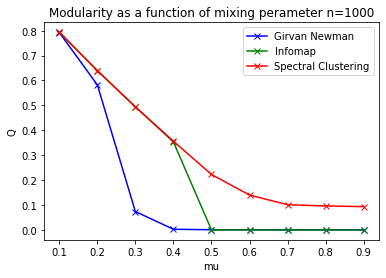

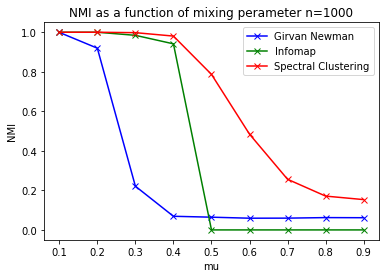

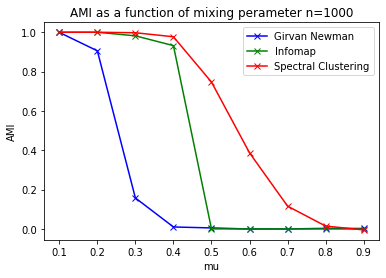

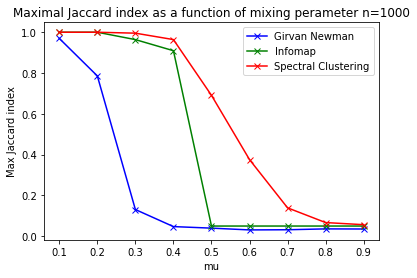

In [11]:
# Reorganisation of reasults
n="1000"
with open('new'+n+'.pkl', 'rb') as f:
    data = pickle.load(f)

[NMI_list,Q_list,AMI_list,J_list] = data
NMI_list = np.array(NMI_list)
Q_list = np.array(Q_list)
AMI_list = np.array(AMI_list)
J_list = np.array(J_list)

GN_Q = Q_list[:,0]
IM_Q = Q_list[:,1]
SC_Q = Q_list[:,2]

GN_NMI = NMI_list[:,0]
IM_NMI = NMI_list[:,1]
SC_NMI = NMI_list[:,2]

GN_AMI = AMI_list[:,0]
IM_AMI = AMI_list[:,1]
SC_AMI = AMI_list[:,2]

GN_J = J_list[:,0]
IM_J = J_list[:,1]
SC_J = J_list[:,2]

# Present figures

fig1 = plt.figure(facecolor=(1, 1, 1))
x = np.linspace(0.1,0.9,9)
plt.plot(x,GN_Q,'xb-')
plt.plot(x,IM_Q,'xg-')
plt.plot(x,SC_Q,'xr-')
plt.xlabel("mu")
plt.ylabel("Q")
plt.title("Modularity as a function of mixing perameter n="+n+"")
plt.legend(['Girvan Newman','Infomap','Spectral Clustering'])
plt.show()
fig1.savefig('../figures/n'+n+'Q')

fig2 = plt.figure(facecolor=(1, 1, 1))
plt.plot(x,GN_NMI,'xb-')
plt.plot(x,IM_NMI,'xg-')
plt.plot(x,SC_NMI,'xr-')
plt.xlabel("mu")
plt.ylabel("NMI")
plt.title("NMI as a function of mixing perameter n="+n+"")
plt.legend(['Girvan Newman','Infomap','Spectral Clustering'])
plt.show()
fig2.savefig('../figures/n'+n+'NMI')


fig3 = plt.figure(facecolor=(1, 1, 1))
plt.plot(x,GN_AMI,'xb-')
plt.plot(x,IM_AMI,'xg-')
plt.plot(x,SC_AMI,'xr-')
plt.xlabel("mu")
plt.ylabel("AMI")
plt.title("AMI as a function of mixing perameter n="+n+"")
plt.legend(['Girvan Newman','Infomap','Spectral Clustering'])
plt.show()
fig3.savefig('../figures/n'+n+'AMI')


fig4 = plt.figure(facecolor=(1, 1, 1))
plt.plot(x,GN_J,'xb-')
plt.plot(x,IM_J,'xg-')
plt.plot(x,SC_J,'xr-')
plt.xlabel("mu")
plt.ylabel("Max Jaccard index")
plt.title("Maximal Jaccard index as a function of mixing perameter n="+n+"")
plt.legend(['Girvan Newman','Infomap','Spectral Clustering'])
plt.show()
fig4.savefig('../figures/n'+n+'MaxJaccard')

